In [ ]:
import os
import glob
import tensorflow as tf
import numpy as np
from PIL import Image
from keras import layers
from keras.models import Sequential
from keras.layers import Conv2D, Flatten, Dense, Activation, MaxPooling2D, Dropout, Input, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from matplotlib import pyplot as plt

In [ ]:
# train 폴더 생성
for i in range(0, 360):
  out_dir ='/content/drive/MyDrive/week4 project-LOMIN/section6-project2/rotate_train/'
  if out_dir not in os.listdir():
    os.mkdir(out_dir + str(i))

In [ ]:
# test 폴더 생성
for i in range(0, 360):
  out_dir ='/content/drive/MyDrive/week4 project-LOMIN/section6-project2/rotate_test/'
  if out_dir not in os.listdir():
    os.mkdir(out_dir + str(i))

In [ ]:
# train이미지 1도씩 회전하여 생성된 폴더별로 저장
a= 0
path = f"/content/drive/MyDrive/week4 project-LOMIN/section6-project2/rotate_train/{a}"
files = glob.glob(path + '/*')

save_path = f"/content/drive/MyDrive/week4 project-LOMIN/section6-project2/rotate_train/{i}/"

for f in files:
    for idx, file in enumerate(files):
        fname, ext = os.path.splitext(file)
        if ext in ['.jpg', '.png', '.gif']:
          for i in range(1, 360):
            if i%40==0:
              print("{} images done".format(i))
            image = Image.open(file)
            width, height = (150,150)
            crop_image = image.rotate(i)
            crop_image.save(save_path + str(idx) + '.jpg')
            				#저장파일 경로 + 순차적으로 저장 +확장자명

In [ ]:
# test이미지 1도씩 회전하여 생성된 폴더별로 저장
a= 0
path = f"/content/drive/MyDrive/week4 project-LOMIN/section6-project2/rotate_test/{a}"
files = glob.glob(path + '/*')

save_path = f"/content/drive/MyDrive/week4 project-LOMIN/section6-project2/rotate_test/{i}/"

for f in files:
    for idx, file in enumerate(files):
        fname, ext = os.path.splitext(file)
        if ext in ['.jpg', '.png', '.JPEG']:
          for i in range(1, 360):
            if i%40==0:
              print("{} images done".format(i))
            image = Image.open(file)
            width, height = (150,150)
            crop_image = image.rotate(i)
            crop_image.save(save_path + str(idx) + '.jpg')
            				#저장파일 경로 + 순차적으로 저장 +확장자명

In [ ]:
#1. 데이터 파일 경로찾기
train_dir = '/content/drive/MyDrive/week4 project-LOMIN/section6-project2/rotate_train/'
test_dir ='/content/drive/MyDrive/week4 project-LOMIN/section6-project2/rotate_test/'

In [ ]:
#2. Set Data Generator
#datagenerator 생성
train_datagenerator = ImageDataGenerator(
    rotation_range = 360,
    rescale = 1./255.,
)
test_datagenerator = ImageDataGenerator(
    rotation_range = 360,
    rescale = 1./255.,
)

In [ ]:
#train_datagenerator을 train image에 적용
train_result = train_datagenerator.flow_from_directory(
    train_dir, 
    target_size = (150, 150),
    batch_size = 128,
    class_mode='categorical' 
)
#test_datagenerator을 test image에 적용
test_result = test_datagenerator.flow_from_directory(
    test_dir, 
    target_size = (150, 150),
    batch_size = 128,
    class_mode='categorical' 
)



Found 2609 images belonging to 1 classes.
Found 100 images belonging to 1 classes.


In [ ]:
#3. model 생성 후, 

model = Sequential([
   Conv2D(64, (3, 3), activation='relu', input_shape=(150, 150, 3)),
   MaxPooling2D(2, 2),
   Conv2D(64, (3, 3), activation='relu'),
   MaxPooling2D(2, 2),
   Conv2D(128, (3, 3), activation='relu'),
   MaxPooling2D(2, 2),
   Conv2D(128, (3, 3), activation='relu'),
   MaxPooling2D(2, 2),
   Flatten(), # 2D -> 1D 변환 
   Dropout(0.2), # 과적합 방지를 위한 Dropout  
   Dense(512, activation='relu'),
   Dense(1, activation='softmax'),
]) 

rlr_call = ReduceLROnPlateau(monitor='val_loss', mode='min', factor=0.1, patience=4, verbose=1)
es_call = EarlyStopping(monitor='val_loss', mode='min', patience=7, verbose=1)

In [ ]:
model.compile(optimizer = 'adam', loss = "categorical_crossentropy", metrics=["accuracy"])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [ ]:
history = model.fit(train_result, epochs=2,
                    validation_data=test_result,
                    callbacks=[rlr_call, es_call])


Epoch 1/2
21/21 [==============================] - 1192s 55s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000 - lr: 0.0010
Epoch 2/2
21/21 [==============================] - 176s 8s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000 - lr: 0.0010


In [ ]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


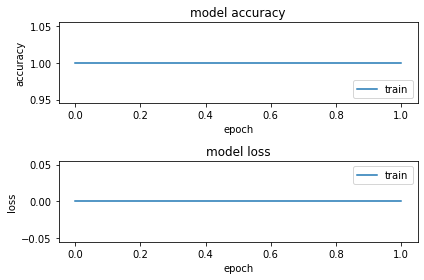

In [ ]:
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

In [ ]:
model.save_weights('rotate_weights.h5')

In [ ]:
model.save('rotate_model.h5')